In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [2]:
df=pd.read_excel('/content/marketing_campaign1 (1) (1).xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [5]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [6]:
df.shape

(2240, 29)

In [7]:
df.iloc[0:1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1


In [8]:
df.loc[:9]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
df.corr(numeric_only=True)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


In [11]:
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
Recency,int64
MntWines,int64


In [12]:
#handling missing value
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [13]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [14]:
df.duplicated().sum()

0

In [15]:
df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [16]:
df.iloc[0]

,0
ID,5524
Year_Birth,1957
Education,Graduation
Marital_Status,Single
Income,58138.0
Kidhome,0
Teenhome,0
Dt_Customer,2012-09-04 00:00:00
Recency,58
MntWines,635


In [17]:
df.iloc[:4]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0


In [18]:
#selecting rows based on cnditionals
df[df['Income']>60000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
12,2125,1959,Graduation,Divorced,63033.0,0,0,2013-11-15,82,194,...,2,0,0,0,0,0,0,3,11,0
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,5,0,0,0,1,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,4478,1979,Graduation,Married,63777.0,1,1,2013-03-24,87,457,...,8,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0


In [19]:
df[df['Income']>60000].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
12,2125,1959,Graduation,Divorced,63033.0,0,0,2013-11-15,82,194,...,2,0,0,0,0,0,0,3,11,0
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,5,0,0,0,1,0,0,3,11,0


In [20]:
df[df['Income']>60000].tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2226,4478,1979,Graduation,Married,63777.0,1,1,2013-03-24,87,457,...,8,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [21]:
df[df['Income']>60000].shape

(841, 29)

In [22]:
df[df['Year_Birth']>1990]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,...,9,0,0,0,0,0,0,3,11,1
111,7431,1991,PhD,Single,68126.0,0,0,2012-11-10,40,1332,...,9,0,1,0,0,0,0,3,11,1
113,999,1991,Graduation,Single,86037.0,0,0,2013-01-02,95,490,...,3,0,1,1,0,0,0,3,11,1
140,821,1992,Master,Single,92859.0,0,0,2012-10-19,46,962,...,2,0,0,0,0,0,0,3,11,0
309,1379,1992,Master,Together,42670.0,0,0,2013-04-27,12,154,...,4,0,0,0,0,0,0,3,11,0
392,2669,1993,Graduation,Single,74293.0,0,0,2014-05-04,66,375,...,2,0,0,0,0,0,0,3,11,0
395,3428,1991,PhD,Together,68682.0,0,0,2013-10-06,56,919,...,2,0,0,0,0,0,0,3,11,0
417,5067,1994,Graduation,Together,80134.0,0,0,2014-02-14,11,966,...,5,0,1,1,1,1,0,3,11,0
508,3386,1992,Graduation,Married,34935.0,0,0,2013-06-21,71,34,...,7,0,0,0,0,0,0,3,11,0
522,9214,1991,Graduation,Married,42691.0,0,0,2013-08-16,48,179,...,5,0,0,0,0,0,0,3,11,0


In [23]:
df[df['Marital_Status'] == 'Married']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
11,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,...,8,0,0,0,0,0,0,3,11,0
14,2569,1987,Graduation,Married,17323.0,0,0,2012-10-10,38,3,...,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,4478,1979,Graduation,Married,63777.0,1,1,2013-03-24,87,457,...,8,0,0,0,0,0,0,3,11,0
2229,10084,1972,Graduation,Married,24434.0,2,0,2014-05-18,9,3,...,7,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0


In [24]:
#sorting value
df.sort_values(by='Income')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,...,20,0,0,0,0,0,0,3,11,0
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,1,0,0,0,0,0,0,3,11,0
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,14,0,0,0,0,0,0,3,11,0
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,19,0,0,0,0,0,0,3,11,0
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,1,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,5079,1971,Graduation,Married,NaN,1,1,2013-03-03,82,71,...,8,0,0,0,0,0,0,3,11,0
2079,10339,1954,Master,Together,NaN,0,1,2013-06-23,83,161,...,6,0,0,0,0,0,0,3,11,0
2081,3117,1955,Graduation,Single,NaN,0,1,2013-10-18,95,264,...,7,0,0,0,0,0,0,3,11,0
2084,5250,1943,Master,Widow,NaN,0,0,2013-10-30,75,532,...,1,0,0,1,0,0,0,3,11,1


In [25]:
df.sort_values(by='Income', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,5079,1971,Graduation,Married,NaN,1,1,2013-03-03,82,71,...,8,0,0,0,0,0,0,3,11,0
2079,10339,1954,Master,Together,NaN,0,1,2013-06-23,83,161,...,6,0,0,0,0,0,0,3,11,0
2081,3117,1955,Graduation,Single,NaN,0,1,2013-10-18,95,264,...,7,0,0,0,0,0,0,3,11,0
2084,5250,1943,Master,Widow,NaN,0,0,2013-10-30,75,532,...,1,0,0,1,0,0,0,3,11,1


In [26]:
df.sort_values(by='Income', ascending=False).head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,3,11,0


In [27]:
df.sort_values(by='Marital_Status').head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,2,0,0,0,0,0,0,3,11,0
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,1,0,0,1,1,0,0,3,11,1
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,...,6,0,0,0,0,0,0,3,11,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,...,5,1,0,0,0,0,0,3,11,1
131,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,...,8,0,0,0,0,0,0,3,11,0


In [28]:
df.sort_values(by='Marital_Status', ascending=False).head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1
1961,3009,1962,PhD,Widow,71670.0,0,0,2013-07-09,8,1462,...,6,0,1,1,0,1,0,3,11,1
240,313,1968,Graduation,Widow,73455.0,0,0,2013-10-28,98,901,...,3,0,1,0,0,0,0,3,11,0
489,3921,1952,2n Cycle,Widow,28457.0,0,0,2012-10-28,96,24,...,8,0,0,0,0,0,0,3,11,0


In [29]:
#finding minium max sum average and count
df['Income'].min()

1730.0

In [30]:
df['Income'].max()

666666.0

In [31]:
df['Income'].mean()

52247.25135379061

In [32]:
df['Income'].count()

2216

In [33]:
df['Income'].sum()

115779909.0

In [34]:
df['Income'].median()

51381.5

In [35]:
df['Income'].std()

25173.07666090141

In [36]:
df['Income'].var()

633683788.5756192

In [37]:
df['Income'].mode()

,Income
0,7500.0


In [38]:
df['Income'].skew()

6.763487372811116

In [39]:
df['Income'].kurt()

159.6366995778005

In [40]:
df['Income'].describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [41]:
df['Income'].value_counts()

,count
Income,
7500.0,12
35860.0,4
37760.0,3
83844.0,3
63841.0,3
...,...
40760.0,1
41452.0,1
6835.0,1


In [42]:
#finding unique value
df['Income'].unique()

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

In [43]:
df['Income'].nunique()

1974

In [44]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [45]:
df['Marital_Status'].nunique()

8

In [46]:
df['NumWebVisitsMonth'].nunique()

16

In [47]:
df['NumWebVisitsMonth'].unique()

array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13])

In [48]:
df['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [49]:
df['Year_Birth'].nunique()

59

In [50]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [51]:
df['Education'].nunique()

5

In [52]:
df['Kidhome'].unique()

array([0, 1, 2])

In [53]:
#groupby
df.groupby('Income').mean(numeric_only=True)

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Income,,,,,,,,,,,,,,,,,,,,,
1730.0,6862.0,1971.0,0.0,0.0,65.0,1.0,1.0,3.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2447.0,5376.0,1979.0,1.0,0.0,42.0,1.0,1.0,1725.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3502.0,11110.0,1973.0,1.0,0.0,56.0,2.0,1.0,1.0,0.0,0.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4023.0,9931.0,1963.0,1.0,1.0,29.0,5.0,0.0,1.0,1.0,1.0,...,19.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4428.0,10311.0,1969.0,0.0,1.0,0.0,16.0,4.0,12.0,2.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157243.0,8475.0,1973.0,0.0,1.0,98.0,20.0,2.0,1582.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
157733.0,5336.0,1971.0,1.0,0.0,37.0,39.0,1.0,9.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
160803.0,1501.0,1982.0,0.0,0.0,21.0,55.0,16.0,1622.0,17.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


In [54]:
df.groupby('Income').max(numeric_only=True)

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Income,,,,,,,,,,,,,,,,,,,,,
1730.0,6862,1971,0,0,65,1,1,3,1,1,...,20,0,0,0,0,0,0,3,11,0
2447.0,5376,1979,1,0,42,1,1,1725,1,1,...,1,0,0,0,0,0,0,3,11,0
3502.0,11110,1973,1,0,56,2,1,1,0,0,...,14,0,0,0,0,0,0,3,11,0
4023.0,9931,1963,1,1,29,5,0,1,1,1,...,19,0,0,0,0,0,0,3,11,0
4428.0,10311,1969,0,1,0,16,4,12,2,4,...,1,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157243.0,8475,1973,0,1,98,20,2,1582,1,2,...,0,0,0,0,0,0,0,3,11,0
157733.0,5336,1971,1,0,37,39,1,9,2,0,...,1,0,0,0,0,0,0,3,11,0
160803.0,1501,1982,0,0,21,55,16,1622,17,3,...,0,0,0,0,0,0,0,3,11,0


In [55]:
df.groupby('Income').min(numeric_only=True)

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Income,,,,,,,,,,,,,,,,,,,,,
1730.0,6862,1971,0,0,65,1,1,3,1,1,...,20,0,0,0,0,0,0,3,11,0
2447.0,5376,1979,1,0,42,1,1,1725,1,1,...,1,0,0,0,0,0,0,3,11,0
3502.0,11110,1973,1,0,56,2,1,1,0,0,...,14,0,0,0,0,0,0,3,11,0
4023.0,9931,1963,1,1,29,5,0,1,1,1,...,19,0,0,0,0,0,0,3,11,0
4428.0,10311,1969,0,1,0,16,4,12,2,4,...,1,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157243.0,8475,1973,0,1,98,20,2,1582,1,2,...,0,0,0,0,0,0,0,3,11,0
157733.0,5336,1971,1,0,37,39,1,9,2,0,...,1,0,0,0,0,0,0,3,11,0
160803.0,1501,1982,0,0,21,55,16,1622,17,3,...,0,0,0,0,0,0,0,3,11,0


In [56]:
df.groupby('Income').sum(numeric_only=True)

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Income,,,,,,,,,,,,,,,,,,,,,
1730.0,6862,1971,0,0,65,1,1,3,1,1,...,20,0,0,0,0,0,0,3,11,0
2447.0,5376,1979,1,0,42,1,1,1725,1,1,...,1,0,0,0,0,0,0,3,11,0
3502.0,11110,1973,1,0,56,2,1,1,0,0,...,14,0,0,0,0,0,0,3,11,0
4023.0,9931,1963,1,1,29,5,0,1,1,1,...,19,0,0,0,0,0,0,3,11,0
4428.0,10311,1969,0,1,0,16,4,12,2,4,...,1,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157243.0,8475,1973,0,1,98,20,2,1582,1,2,...,0,0,0,0,0,0,0,3,11,0
157733.0,5336,1971,1,0,37,39,1,9,2,0,...,1,0,0,0,0,0,0,3,11,0
160803.0,1501,1982,0,0,21,55,16,1622,17,3,...,0,0,0,0,0,0,0,3,11,0


In [57]:
df.groupby('Income').count()

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Income,,,,,,,,,,,,,,,,,,,,,
1730.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2447.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3502.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4023.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4428.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157243.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
157733.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
160803.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [58]:
#grouping rows by time
df.groupby('Year_Birth').mean(numeric_only=True)

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Year_Birth,,,,,,,,,,,,,,,,,,,,,
1893,11004.000000,60182.000000,0.000000,1.000000,23.000000,8.000000,0.000000,5.000000,7.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
1899,1150.000000,83532.000000,0.000000,0.000000,36.000000,755.000000,144.000000,562.000000,104.000000,64.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
1900,7829.000000,36640.000000,1.000000,0.000000,99.000000,15.000000,6.000000,8.000000,7.000000,4.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0,11.0,0.000000
1940,6663.000000,51141.000000,0.000000,0.000000,96.000000,144.000000,0.000000,7.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
1941,6932.000000,93027.000000,0.000000,0.000000,77.000000,1285.000000,42.000000,716.000000,55.000000,0.000000,...,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
1943,5244.714286,62324.166667,0.000000,0.000000,61.571429,635.142857,33.142857,304.857143,127.142857,44.285714,...,3.571429,0.285714,0.000000,0.285714,0.000000,0.000000,0.142857,3.0,11.0,0.428571
1944,4478.428571,66477.142857,0.000000,0.000000,36.857143,566.000000,66.428571,274.857143,63.857143,35.571429,...,3.142857,0.000000,0.285714,0.142857,0.285714,0.000000,0.000000,3.0,11.0,0.142857
1945,5217.875000,70375.375000,0.000000,0.000000,32.625000,445.500000,67.500000,301.625000,58.125000,68.000000,...,3.625000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.250000
1946,5049.625000,59944.250000,0.250000,0.187500,40.312500,431.937500,26.437500,185.187500,71.437500,39.937500,...,4.937500,0.000000,0.062500,0.187500,0.312500,0.000000,0.000000,3.0,11.0,0.187500


In [59]:
df['Year_Birth']=np.where(df['Year_Birth']<1990,1990,df['Year_Birth'])
df['Year_Birth']=np.where(df['Year_Birth']<1980,1980,df['Year_Birth'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1990,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1990,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1990,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1990,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1990,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1990,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1990,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1990,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1990,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [60]:
df['Marital_Status']=np.random.choice(['Married','Single','Divorced'],size=len(df))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1990,Graduation,Divorced,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1990,Graduation,Married,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1990,Graduation,Single,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1990,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1990,PhD,Single,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1990,Graduation,Divorced,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1990,PhD,Married,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1990,Graduation,Married,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1990,Master,Married,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [61]:
df['Education']=np.random.choice(['Graduation','PhD','Master','Basic','2n Cycle'],size=len(df))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1990,Master,Divorced,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1990,Graduation,Married,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1990,Master,Single,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1990,2n Cycle,Married,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1990,Basic,Single,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1990,PhD,Divorced,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1990,Master,Married,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1990,Basic,Married,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1990,PhD,Married,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [62]:
df['NumWebVisitsMonth']=np.random.randint(1,10,size=len(df))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1990,Master,Divorced,58138.0,0,0,2012-09-04,58,635,...,3,0,0,0,0,0,0,3,11,1
1,2174,1990,Graduation,Married,46344.0,1,1,2014-03-08,38,11,...,2,0,0,0,0,0,0,3,11,0
2,4141,1990,Master,Single,71613.0,0,0,2013-08-21,26,426,...,5,0,0,0,0,0,0,3,11,0
3,6182,1990,2n Cycle,Married,26646.0,1,0,2014-02-10,26,11,...,5,0,0,0,0,0,0,3,11,0
4,5324,1990,Basic,Single,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1990,PhD,Divorced,61223.0,0,1,2013-06-13,46,709,...,3,0,0,0,0,0,0,3,11,0
2236,4001,1990,Master,Married,64014.0,2,1,2014-06-10,56,406,...,9,0,0,0,1,0,0,3,11,0
2237,7270,1990,Basic,Married,56981.0,0,0,2014-01-25,91,908,...,4,0,1,0,0,0,0,3,11,0
2238,8235,1990,PhD,Married,69245.0,0,1,2014-01-24,8,428,...,8,0,0,0,0,0,0,3,11,0


In [63]:
#Aggregating operation and statistics
df.agg({'Income':['mean','max','min','sum','count']})

,Income
mean,5.224725e+04
max,6.666660e+05
min,1.730000e+03
sum,1.157799e+08
count,2.216000e+03


In [64]:
df.agg({'Year_Birth':['mean','max','min','sum','count']})

,Year_Birth
mean,1.990047e+03
max,1.996000e+03
min,1.990000e+03
sum,4.457705e+06
count,2.240000e+03


In [65]:
df.agg({'Kidhome':['mean','max','min','sum','count']})

,Kidhome
mean,0.444196
max,2.000000
min,0.000000
sum,995.000000
count,2240.000000


In [66]:
df.agg({'NumWebVisitsMonth':['mean','max','min','sum','count']})

,NumWebVisitsMonth
mean,4.954911
max,9.000000
min,1.000000
sum,11099.000000
count,2240.000000


In [67]:
df.agg({'Teenhome':['mean','max','min','sum','count']})

,Teenhome
mean,0.50625
max,2.00000
min,0.00000
sum,1134.00000
count,2240.00000


In [68]:
df.agg({'Recency':['mean','max','min','sum','count']})

,Recency
mean,49.109375
max,99.000000
min,0.000000
sum,110005.000000
count,2240.000000


In [69]:
df.agg({'MntWines':['mean','max','min','sum','count']})

,MntWines
mean,303.935714
max,1493.000000
min,0.000000
sum,680816.000000
count,2240.000000


In [70]:
df.groupby('Marital_Status').agg({'Income':['mean','max','min','sum','count']})

Income                                    
                        mean       max     min         sum count
Marital_Status                                                  
Divorced        53751.997326  666666.0  2447.0  40206494.0   748
Married         52747.273087  157733.0  4023.0  39982433.0   758
Single          50128.143662  162397.0  1730.0  35590982.0   710

In [71]:
df.groupby('Education').agg({'Income':['mean','max','min','sum','count']})

Income                                    
                    mean       max     min         sum count
Education                                                   
2n Cycle    51375.774554  156924.0  1730.0  23016347.0   448
Basic       51597.205357  160803.0  6835.0  23115548.0   448
Graduation  51255.036866  157146.0  4861.0  22244686.0   434
Master      52844.121739  153924.0  9255.0  24308296.0   460
PhD         54213.690141  666666.0  2447.0  23095032.0   426

In [72]:
df.groupby('NumWebVisitsMonth').agg({'Income':['mean','max','min','sum','count']})

Income                                     
                           mean       max      min         sum count
NumWebVisitsMonth                                                   
1                  50092.718367   95529.0   5305.0  12272716.0   245
2                  51601.027237  160803.0   1730.0  13261464.0   257
3                  52094.253968   92491.0   3502.0  13127752.0   252
4                  56682.709163  666666.0   4023.0  14227360.0   251
5                  50577.788136  153924.0  13084.0  11936358.0   236
6                  49919.884615   96547.0   8028.0  11681253.0   234
7                  53018.090580  157243.0   4428.0  14632993.0   276
8                  52638.268722   94384.0   6560.0  11948887.0   227
9                  53324.058824  156924.0   2447.0  12691126.0   238

In [73]:
df.groupby('Teenhome').agg({'Income':['mean','max','min','sum','count']})

Income                                    
                  mean       max     min         sum count
Teenhome                                                  
0         51888.334786  666666.0  1730.0  59515920.0  1147
1         52485.755403  162397.0  4023.0  53430499.0  1018
2         55558.627451   94871.0  7144.0   2833490.0    51

In [74]:
df.groupby('Recency').agg({'Income':['mean','max','min','sum','count']})

Income                                    
                 mean       max      min        sum count
Recency                                                  
0        50244.142857   84835.0   4428.0  1406836.0    28
1        54531.125000   95169.0  14796.0  1308747.0    24
2        52747.178571   90369.0   6560.0  1476921.0    28
3        55948.448276   80011.0  23830.0  1622505.0    29
4        56235.423077   96547.0  21994.0  1462121.0    26
...               ...       ...      ...        ...   ...
95       54393.166667   86037.0  18701.0   979077.0    18
96       50268.434783   86857.0   7500.0  1156174.0    23
97       51613.200000   93404.0  23331.0  1032264.0    20
98       59095.454545  157243.0   7500.0  1300100.0    22
99       52218.411765   94871.0  20130.0   887713.0    17

[100 rows x 5 columns]

In [75]:
df.groupby('MntWines').agg({'Income':['mean','max','min','sum','count']})

Income                                    
                  mean       max      min        sum count
MntWines                                                  
0         18167.461538   27733.0   7500.0   236177.0    13
1         28102.081081  157146.0   1730.0  1039777.0    37
2         24930.214286  156924.0   3502.0  1047069.0    42
3         24789.133333   38590.0   7500.0   743674.0    30
4         25723.484848   42997.0  10245.0   848875.0    33
...                ...       ...      ...        ...   ...
1462      71670.000000   71670.0  71670.0    71670.0     1
1478      84169.000000   84169.0  84169.0   168338.0     2
1486      81929.000000   81929.0  81929.0    81929.0     1
1492      87771.000000   87771.0  87771.0   175542.0     2
1493      80360.000000   80360.0  80360.0    80360.0     1

[776 rows x 5 columns]

In [76]:
df.groupby('Marital_Status').agg({'Year_Birth':['mean','max','min','sum','count']})

Year_Birth                           
                       mean   max   min      sum count
Marital_Status                                        
Divorced        1990.039735  1996  1990  1502480   755
Married         1990.041940  1995  1990  1518402   763
Single          1990.059557  1996  1990  1436823   722

In [77]:
df.groupby('Education').agg({'Year_Birth':['mean','max','min','sum','count']})

Year_Birth                          
                   mean   max   min     sum count
Education                                        
2n Cycle    1990.076923  1996  1990  905485   455
Basic       1990.037611  1996  1990  899497   452
Graduation  1990.041002  1995  1990  873628   439
Master      1990.043103  1994  1990  923380   464
PhD         1990.034884  1995  1990  855715   430

In [78]:
df.groupby('NumWebVisitsMonth').agg({'Year_Birth':['mean','max','min','sum','count']})

Year_Birth                          
                          mean   max   min     sum count
NumWebVisitsMonth                                       
1                  1990.060000  1995  1990  497515   250
2                  1990.045977  1994  1990  519402   261
3                  1990.035573  1994  1990  503479   253
4                  1990.055777  1996  1990  499504   251
5                  1990.028926  1996  1990  481587   242
6                  1990.102128  1995  1990  467674   235
7                  1990.032143  1993  1990  557209   280
8                  1990.021930  1993  1990  453725   228
9                  1990.041667  1995  1990  477610   240

In [79]:
df.groupby('Teenhome').agg({'Year_Birth':['mean','max','min','sum','count']})

Year_Birth                           
                 mean   max   min      sum count
Teenhome                                        
0         1990.090674  1996  1990  2304525  1158
1         1990.000000  1990  1990  2049700  1030
2         1990.000000  1990  1990   103480    52

In [80]:
df.groupby('Recency').agg({'Year_Birth':['mean','max','min','sum','count']})

Year_Birth                         
                mean   max   min    sum count
Recency                                      
0        1990.000000  1990  1990  55720    28
1        1990.000000  1990  1990  47760    24
2        1990.000000  1990  1990  55720    28
3        1990.000000  1990  1990  57710    29
4        1990.000000  1990  1990  53730    27
...              ...   ...   ...    ...   ...
95       1990.052632  1991  1990  37811    19
96       1990.000000  1990  1990  49750    25
97       1990.000000  1990  1990  39800    20
98       1990.000000  1990  1990  43780    22
99       1990.000000  1990  1990  33830    17

[100 rows x 5 columns]

In [81]:
df.groupby('MntWines').agg({'Year_Birth':['mean','max','min','sum','count']})

Year_Birth                         
                 mean   max   min    sum count
MntWines                                      
0         1990.538462  1996  1990  25877    13
1         1990.054054  1992  1990  73632    37
2         1990.047619  1992  1990  83582    42
3         1990.200000  1996  1990  59706    30
4         1990.303030  1995  1990  65680    33
...               ...   ...   ...    ...   ...
1462      1990.000000  1990  1990   1990     1
1478      1990.000000  1990  1990   3980     2
1486      1990.000000  1990  1990   1990     1
1492      1990.000000  1990  1990   3980     2
1493      1990.000000  1990  1990   1990     1

[776 rows x 5 columns]

In [82]:
df.groupby('Marital_Status').agg({'Kidhome':['mean','max','min','sum','count']})

Kidhome                   
                    mean max min  sum count
Marital_Status                             
Divorced        0.447682   2   0  338   755
Married         0.454784   2   0  347   763
Single          0.429363   2   0  310   722

In [83]:
df.groupby('Education').apply(lambda x:x.count())

<ipython-input-83-a68ba32b4afa>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Education').apply(lambda x:x.count())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Education,,,,,,,,,,,,,,,,,,,,,
2n Cycle,455,455,455,455,448,455,455,455,455,455,...,455,455,455,455,455,455,455,455,455,455
Basic,452,452,452,452,448,452,452,452,452,452,...,452,452,452,452,452,452,452,452,452,452
Graduation,439,439,439,439,434,439,439,439,439,439,...,439,439,439,439,439,439,439,439,439,439
Master,464,464,464,464,460,464,464,464,464,464,...,464,464,464,464,464,464,464,464,464,464
PhD,430,430,430,430,426,430,430,430,430,430,...,430,430,430,430,430,430,430,430,430,430


In [84]:
df.groupby('NumWebVisitsMonth').apply(lambda x:x.count())

<ipython-input-84-bd1ddf52e3a8>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('NumWebVisitsMonth').apply(lambda x:x.count())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
NumWebVisitsMonth,,,,,,,,,,,,,,,,,,,,,
1,250,250,250,250,245,250,250,250,250,250,...,250,250,250,250,250,250,250,250,250,250
2,261,261,261,261,257,261,261,261,261,261,...,261,261,261,261,261,261,261,261,261,261
3,253,253,253,253,252,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
4,251,251,251,251,251,251,251,251,251,251,...,251,251,251,251,251,251,251,251,251,251
5,242,242,242,242,236,242,242,242,242,242,...,242,242,242,242,242,242,242,242,242,242
6,235,235,235,235,234,235,235,235,235,235,...,235,235,235,235,235,235,235,235,235,235
7,280,280,280,280,276,280,280,280,280,280,...,280,280,280,280,280,280,280,280,280,280
8,228,228,228,228,227,228,228,228,228,228,...,228,228,228,228,228,228,228,228,228,228
9,240,240,240,240,238,240,240,240,240,240,...,240,240,240,240,240,240,240,240,240,240


In [85]:
df.groupby('Teenhome').apply(lambda x:x.count())

<ipython-input-85-30055830caac>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Teenhome').apply(lambda x:x.count())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Teenhome,,,,,,,,,,,,,,,,,,,,,
0,1158,1158,1158,1158,1147,1158,1158,1158,1158,1158,...,1158,1158,1158,1158,1158,1158,1158,1158,1158,1158
1,1030,1030,1030,1030,1018,1030,1030,1030,1030,1030,...,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030
2,52,52,52,52,51,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52


In [86]:
df.groupby('Recency').apply(lambda x:x.count())

<ipython-input-86-3c8bd861a899>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Recency').apply(lambda x:x.count())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Recency,,,,,,,,,,,,,,,,,,,,,
0,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
1,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
2,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
3,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
4,27,27,27,27,26,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,19,19,19,18,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
96,25,25,25,25,23,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
97,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [87]:
df.groupby('MntWines').apply(lambda x:x.count())

<ipython-input-87-d2408ab6976e>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('MntWines').apply(lambda x:x.count())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
MntWines,,,,,,,,,,,,,,,,,,,,,
0,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
1,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
2,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
3,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
4,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1478,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1486,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [88]:
df.groupby('Marital_Status').apply(lambda x:x.count())

<ipython-input-88-f09a19090646>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Marital_Status').apply(lambda x:x.count())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Marital_Status,,,,,,,,,,,,,,,,,,,,,
Divorced,755,755,755,755,748,755,755,755,755,755,...,755,755,755,755,755,755,755,755,755,755
Married,763,763,763,763,758,763,763,763,763,763,...,763,763,763,763,763,763,763,763,763,763
Single,722,722,722,722,710,722,722,722,722,722,...,722,722,722,722,722,722,722,722,722,722


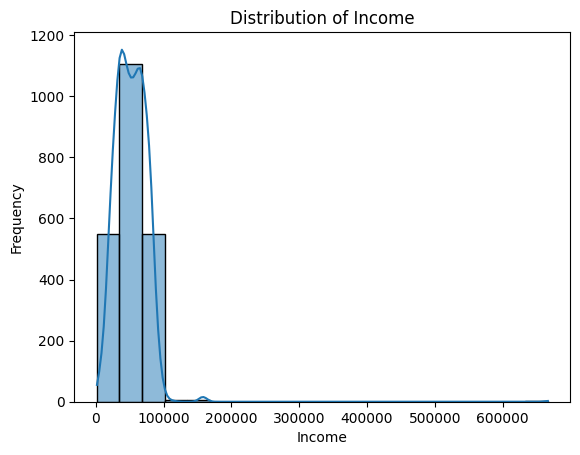

In [89]:
# Visualize distributions of key features
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()




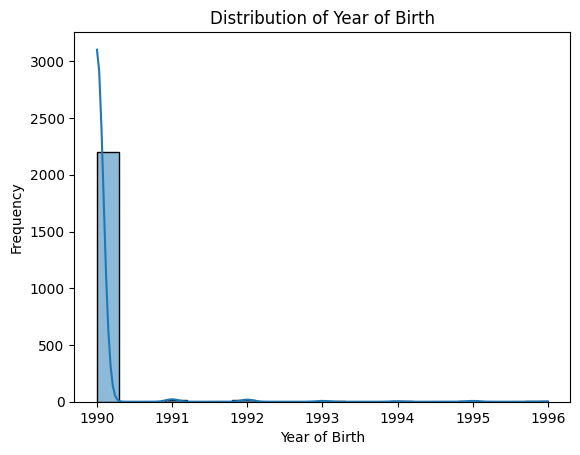

In [90]:
sns.histplot(df['Year_Birth'], bins=20, kde=True)
plt.title('Distribution of Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()

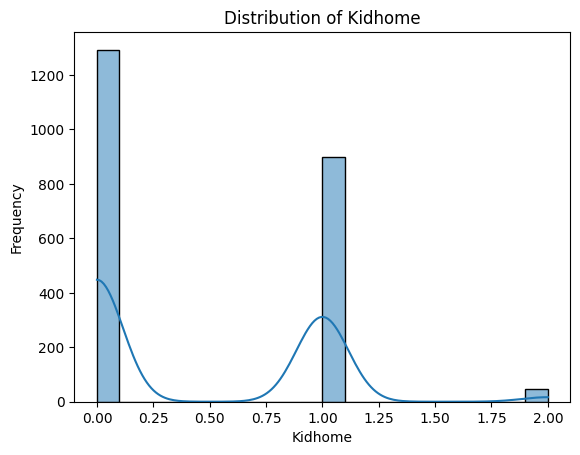

In [91]:
sns.histplot(df['Kidhome'], bins=20, kde=True)
plt.title('Distribution of Kidhome')
plt.xlabel('Kidhome')
plt.ylabel('Frequency')
plt.show()

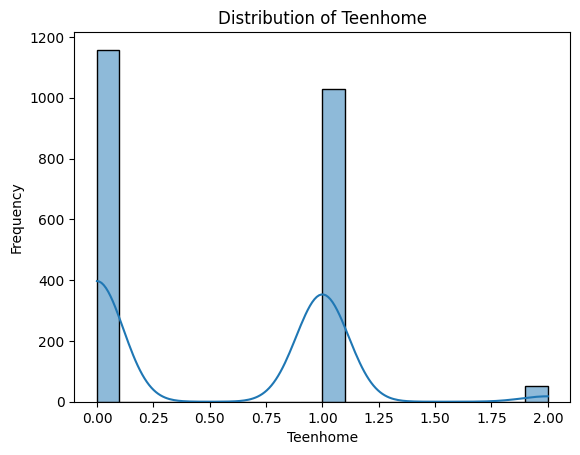

In [92]:
sns.histplot(df['Teenhome'], bins=20, kde=True)
plt.title('Distribution of Teenhome')
plt.xlabel('Teenhome')
plt.ylabel('Frequency')
plt.show()

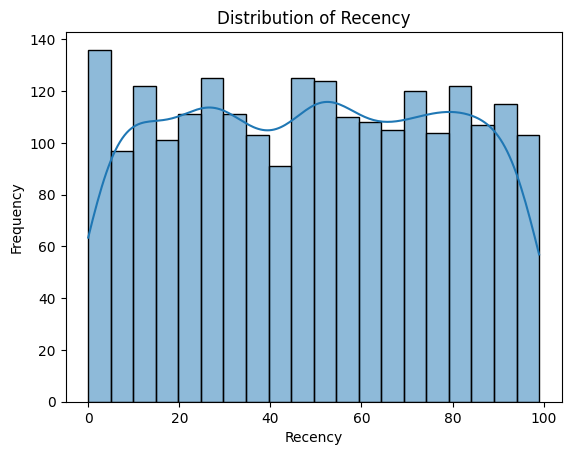

In [93]:
sns.histplot(df['Recency'], bins=20, kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

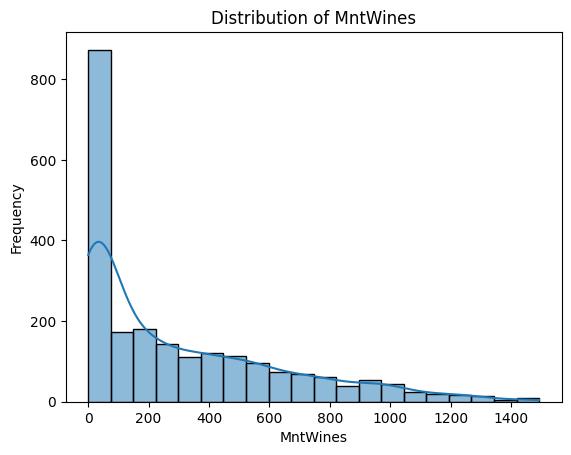

In [94]:
sns.histplot(df['MntWines'], bins=20, kde=True)
plt.title('Distribution of MntWines')
plt.xlabel('MntWines')
plt.ylabel('Frequency')
plt.show()

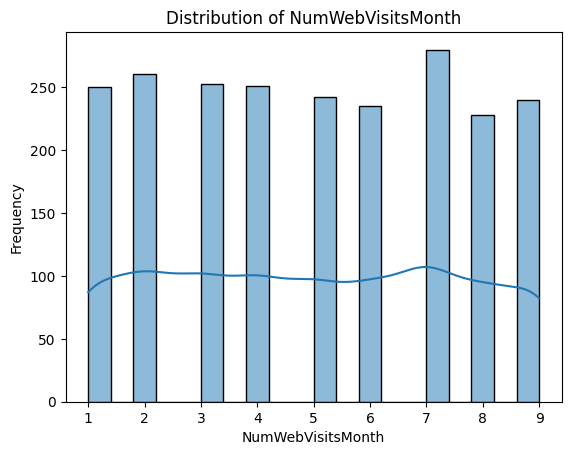

In [95]:
sns.histplot(df['NumWebVisitsMonth'], bins=20, kde=True)
plt.title('Distribution of NumWebVisitsMonth')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Frequency')
plt.show()

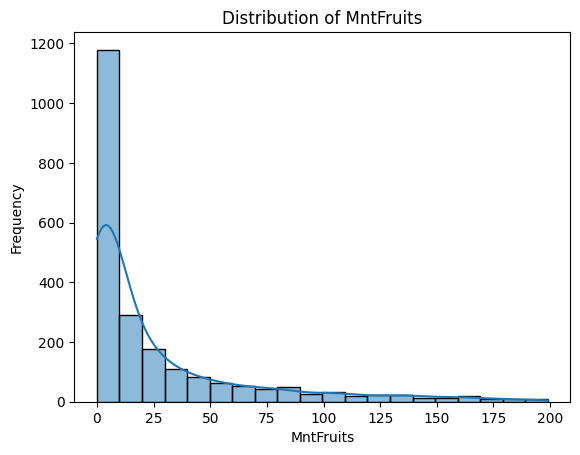

In [96]:
sns.histplot(df['MntFruits'], bins=20, kde=True)
plt.title('Distribution of MntFruits')
plt.xlabel('MntFruits')
plt.ylabel('Frequency')
plt.show()

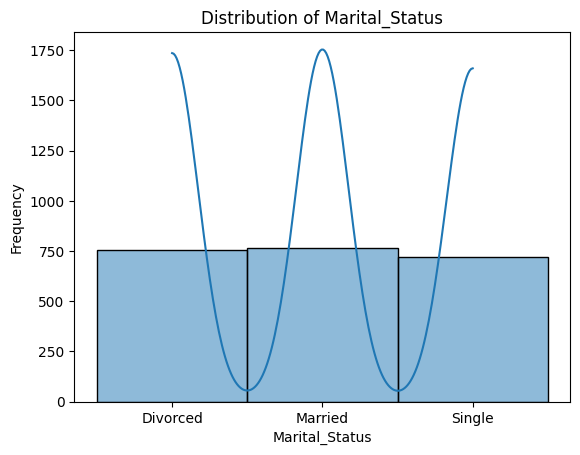

In [97]:
sns.histplot(df['Marital_Status'], bins=20, kde=True)
plt.title('Distribution of Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Frequency')
plt.show()

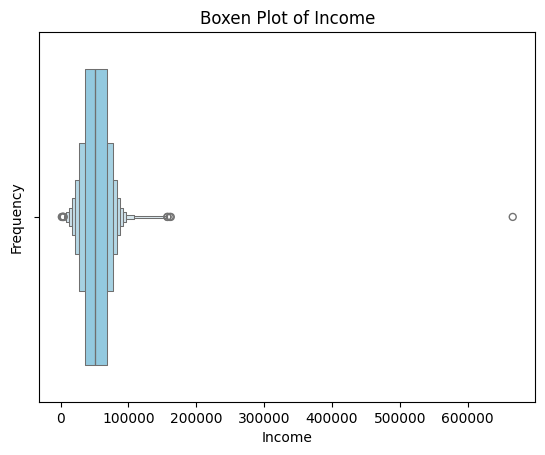

In [98]:
sns.boxenplot(x='Income', data=df, color='skyblue')
plt.title('Boxen Plot of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

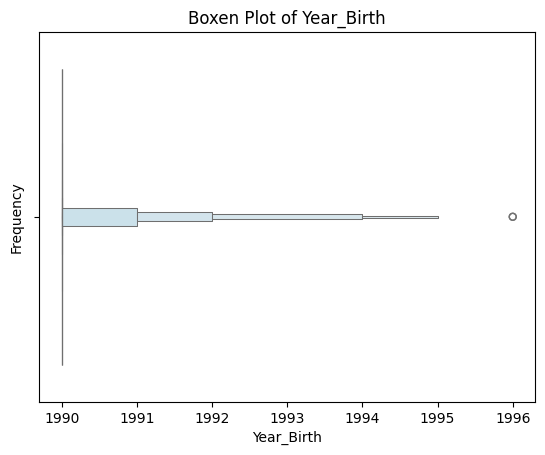

In [99]:
sns.boxenplot(x='Year_Birth', data=df, color='skyblue')
plt.title('Boxen Plot of Year_Birth')
plt.xlabel('Year_Birth')
plt.ylabel('Frequency')
plt.show()

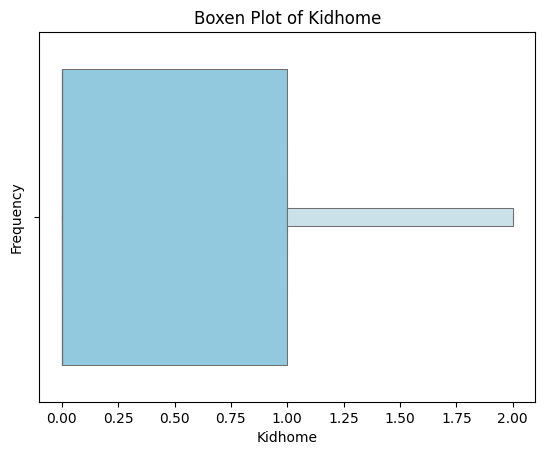

In [100]:
sns.boxenplot(x='Kidhome', data=df, color='skyblue')
plt.title('Boxen Plot of Kidhome')
plt.xlabel('Kidhome')
plt.ylabel('Frequency')
plt.show()

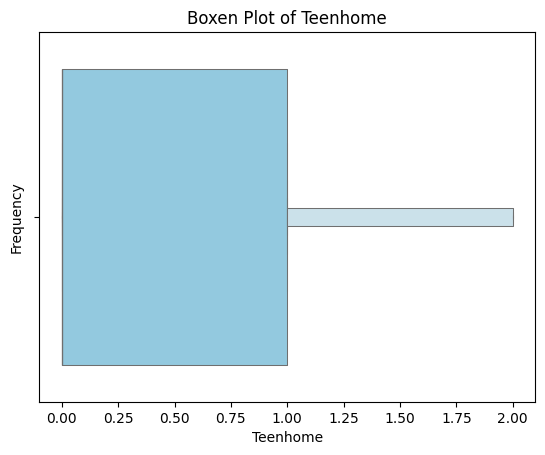

In [101]:
sns.boxenplot(x='Teenhome', data=df, color='skyblue')
plt.title('Boxen Plot of Teenhome')
plt.xlabel('Teenhome')
plt.ylabel('Frequency')
plt.show()

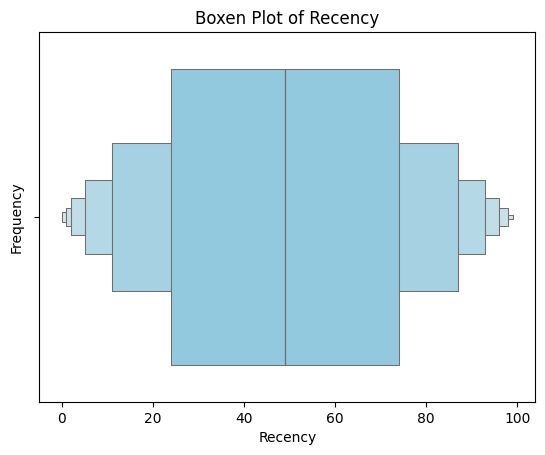

In [102]:
sns.boxenplot(x='Recency', data=df, color='skyblue')
plt.title('Boxen Plot of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

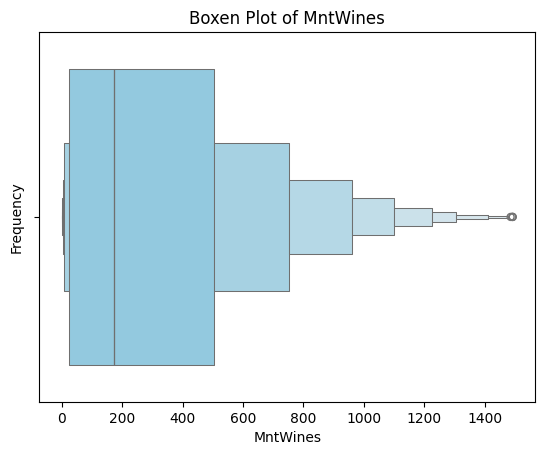

In [103]:
sns.boxenplot(x='MntWines', data=df, color='skyblue')
plt.title('Boxen Plot of MntWines')
plt.xlabel('MntWines')
plt.ylabel('Frequency')
plt.show()

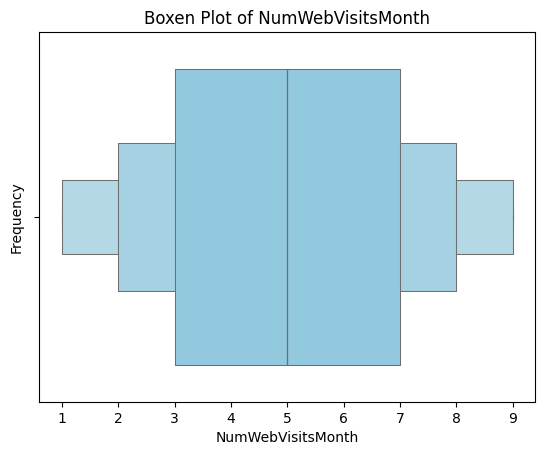

In [104]:
sns.boxenplot(x='NumWebVisitsMonth', data=df, color='skyblue')
plt.title('Boxen Plot of NumWebVisitsMonth')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Frequency')
plt.show()

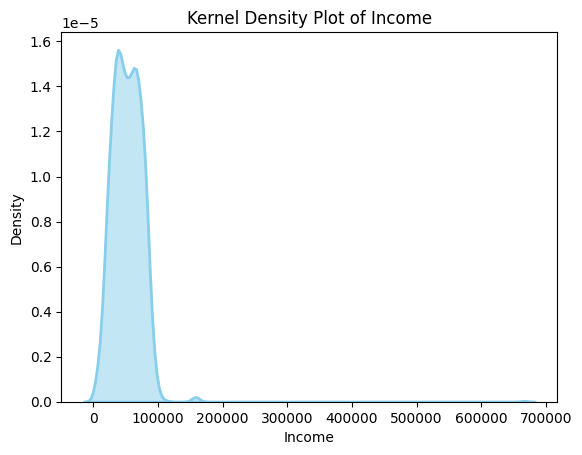

In [105]:
#density plot
sns.kdeplot(data=df, x='Income', fill=True, color='skyblue', alpha=0.5, linewidth=2, bw_adjust=1, label='Income')
plt.title('Kernel Density Plot of Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

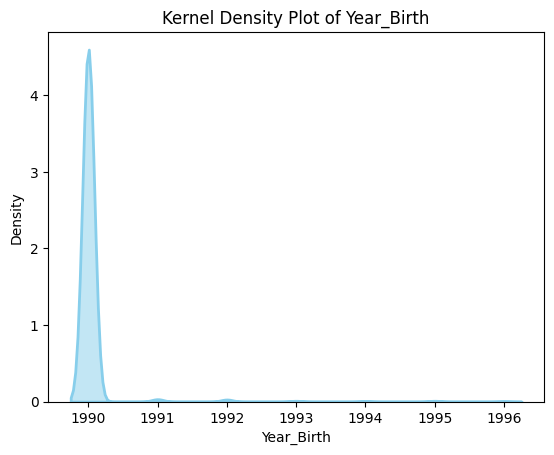

In [106]:
sns.kdeplot(data=df, x='Year_Birth', fill=True, color='skyblue', alpha=0.5, linewidth=2, bw_adjust=1, label='Year_Birth')
plt.title('Kernel Density Plot of Year_Birth')
plt.xlabel('Year_Birth')
plt.ylabel('Density')
plt.show()

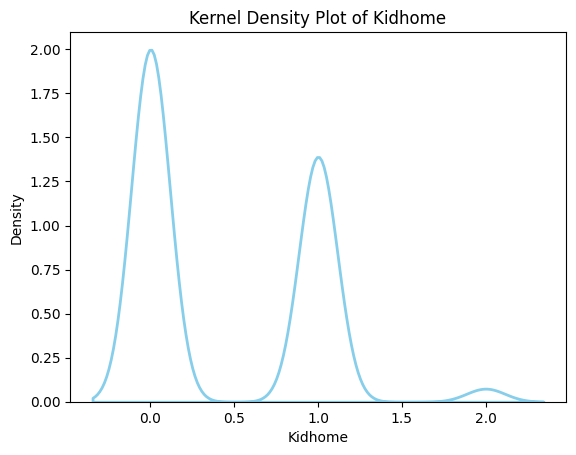

In [107]:
sns.kdeplot(data=df, x='Kidhome', fill=True, color='skyblue', alpha=0, linewidth=2, bw_adjust=1, label='Kidhome')
plt.title('Kernel Density Plot of Kidhome')
plt.xlabel('Kidhome')
plt.ylabel('Density')
plt.show()

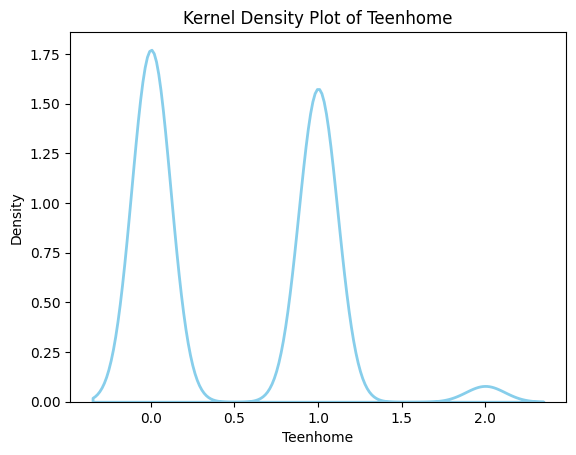

In [108]:
sns.kdeplot(data=df, x='Teenhome', fill=True, color='skyblue', alpha=0, linewidth=2, bw_adjust=1, label='Teenhome')
plt.title('Kernel Density Plot of Teenhome')
plt.xlabel('Teenhome')
plt.ylabel('Density')
plt.show()

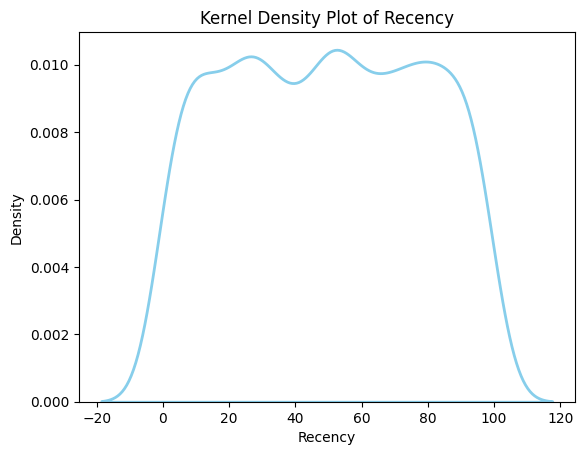

In [109]:
sns.kdeplot(data=df, x='Recency', fill=True, color='skyblue', alpha=0, linewidth=2,bw_adjust=1, label='Recency')
plt.title('Kernel Density Plot of Recency')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.show()

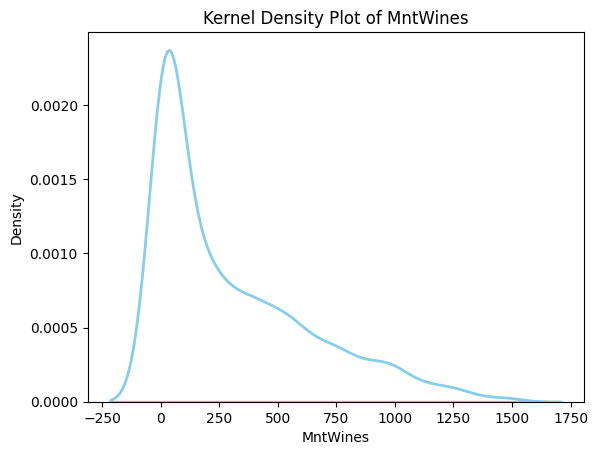

In [110]:
sns.kdeplot(data=df, x='MntWines', fill=True, color='skyblue', alpha=0, linewidth=2, bw_adjust=1, label='MntWines')
plt.title('Kernel Density Plot of MntWines')
plt.xlabel('MntWines')
plt.ylabel('Density')
plt.show()

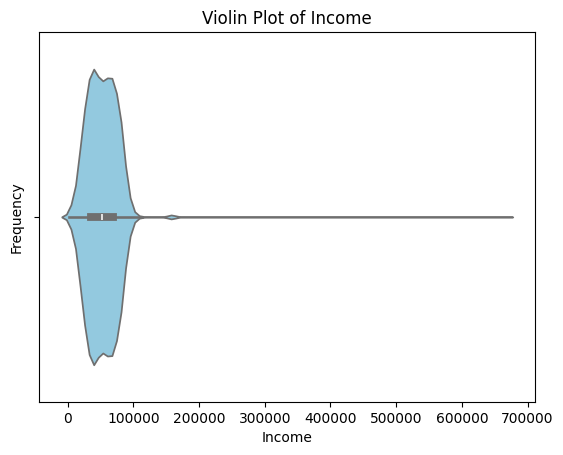

In [111]:
#violinplot
sns.violinplot(x='Income', data=df, color='skyblue')
plt.title('Violin Plot of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

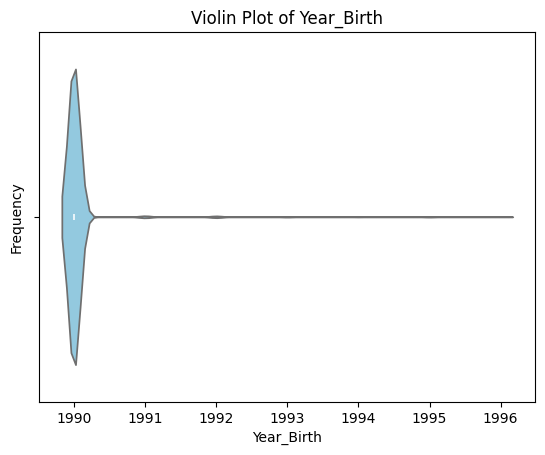

In [112]:
sns.violinplot(x='Year_Birth', data=df, color='skyblue')
plt.title('Violin Plot of Year_Birth')
plt.xlabel('Year_Birth')
plt.ylabel('Frequency')
plt.show()

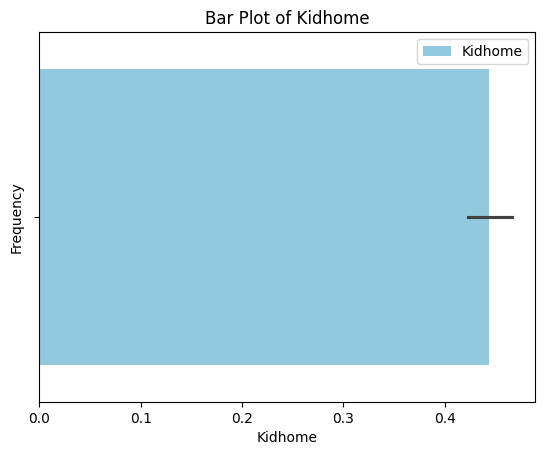

In [113]:
sns.barplot(x='Kidhome', data=df, color='skyblue', label='Kidhome')
plt.title('Bar Plot of Kidhome')
plt.xlabel('Kidhome')
plt.ylabel('Frequency')
plt.show()

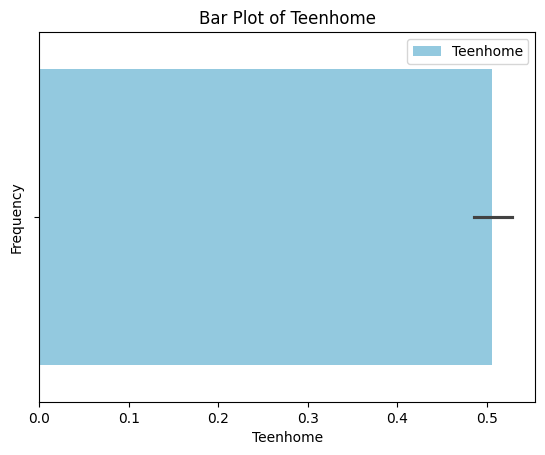

In [114]:
sns.barplot(x='Teenhome', data=df, color='skyblue', label='Teenhome')
plt.title('Bar Plot of Teenhome')
plt.xlabel('Teenhome')
plt.ylabel('Frequency')
plt.show()

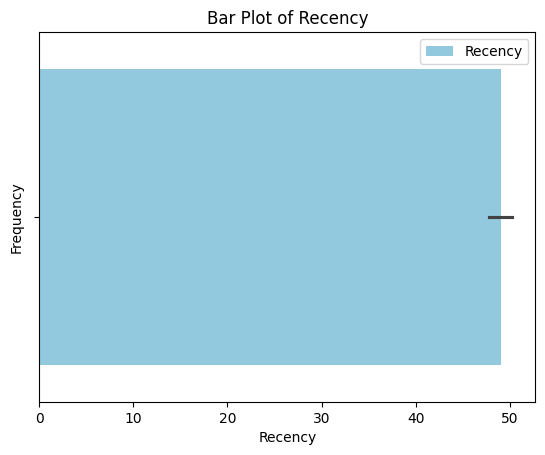

In [115]:
sns.barplot(x='Recency', data=df, color='skyblue', label='Recency')
plt.title('Bar Plot of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

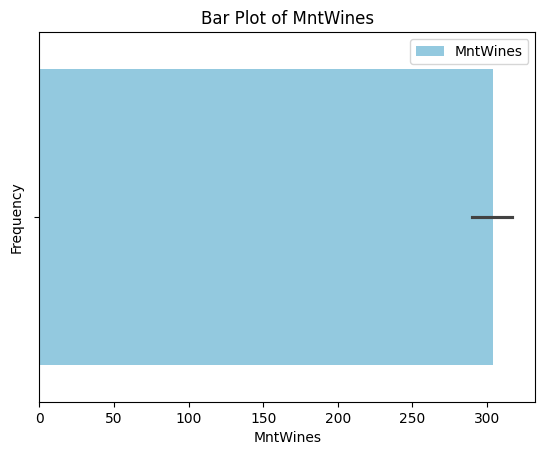

In [116]:
sns.barplot(x='MntWines', data=df, color='skyblue', label='MntWines')
plt.title('Bar Plot of MntWines')
plt.xlabel('MntWines')
plt.ylabel('Frequency')
plt.show()

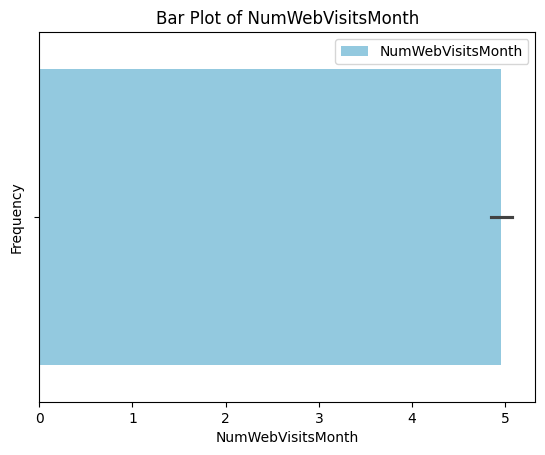

In [117]:
sns.barplot(x='NumWebVisitsMonth', data=df, color='skyblue', label='NumWebVisitsMonth')
plt.title('Bar Plot of NumWebVisitsMonth')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Frequency')
plt.show()

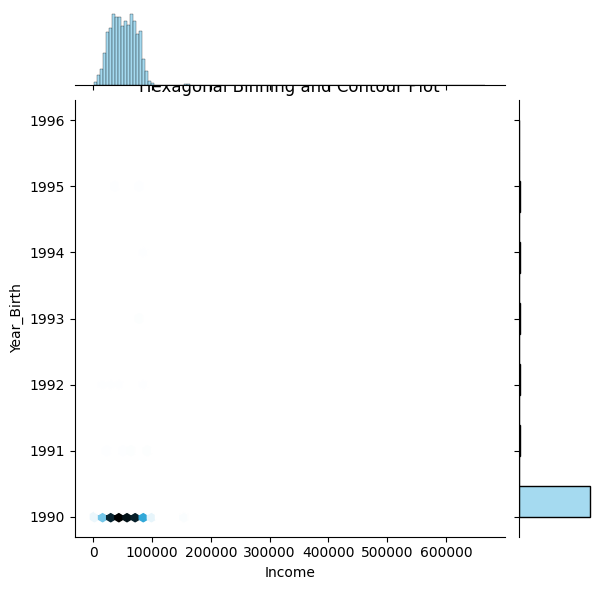

In [118]:
#Hexagonal binning and contours
sns.jointplot(x='Income', y='Year_Birth', data=df, kind='hex', color='skyblue')
plt.title('Hexagonal Binning and Contour Plot')
plt.xlabel('Income')
plt.ylabel('Year_Birth')
plt.show()

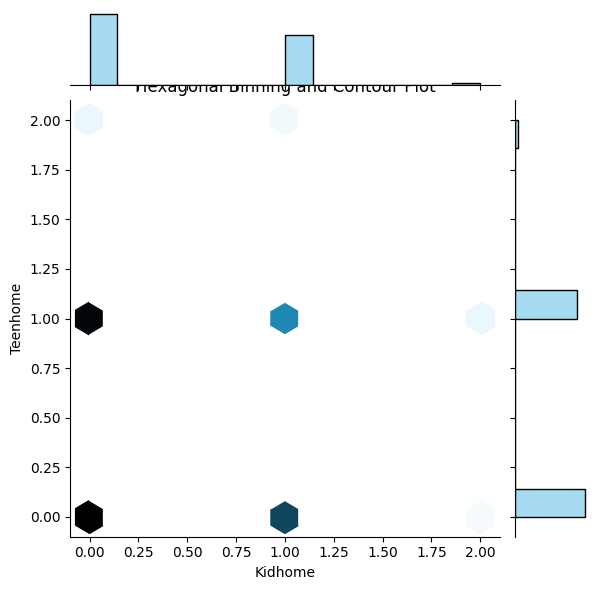

In [119]:
sns.jointplot(x='Kidhome', y='Teenhome', data=df, kind='hex', color='skyblue')
plt.title('Hexagonal Binning and Contour Plot')
plt.xlabel('Kidhome')
plt.ylabel('Teenhome')
plt.show()

Text(37.722222222222214, 0.5, 'MntWines')

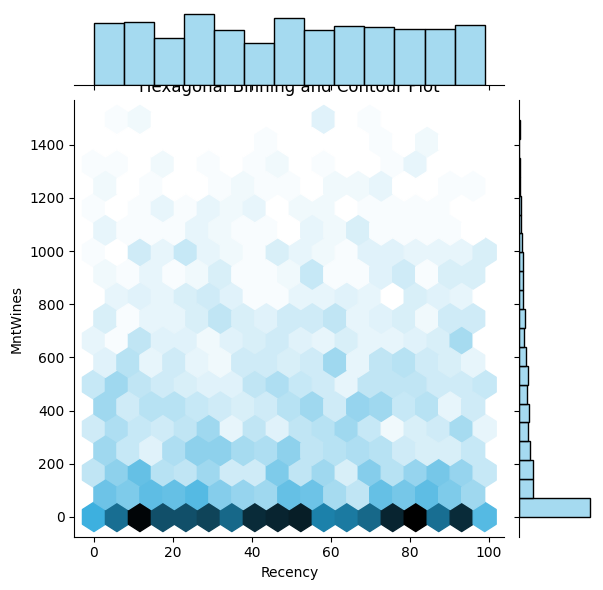

In [120]:
sns.jointplot(x='Recency', y='MntWines', data=df, kind='hex', color='skyblue')
plt.title('Hexagonal Binning and Contour Plot')
plt.xlabel('Recency')
plt.ylabel('MntWines')

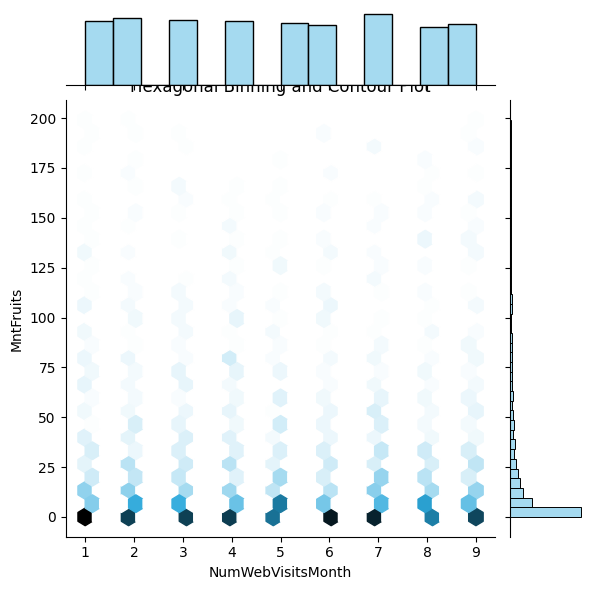

In [121]:
sns.jointplot(x='NumWebVisitsMonth', y='MntFruits', data=df, kind='hex', color='skyblue')
plt.title('Hexagonal Binning and Contour Plot')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('MntFruits')
plt.show()

Text(37.722222222222214, 0.5, 'MntFruits')

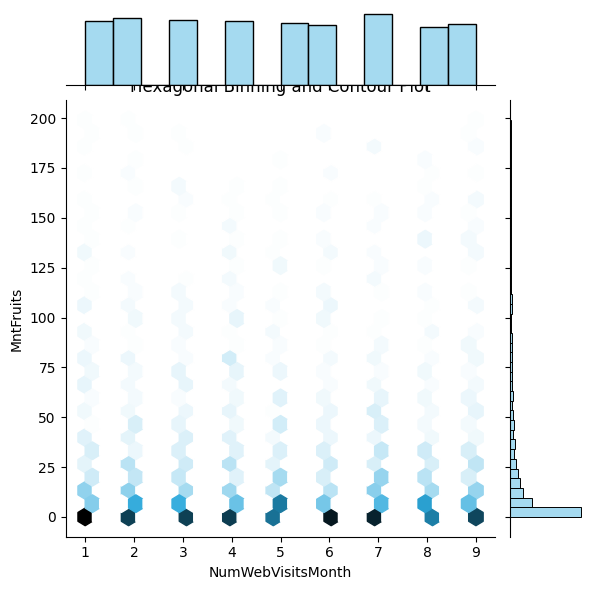

In [122]:
sns.jointplot(x='NumWebVisitsMonth', y='MntFruits', data=df, kind='hex', color='skyblue')
plt.title('Hexagonal Binning and Contour Plot')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('MntFruits')

In [123]:
#contigency table
pd.crosstab(df['Income'], df['Year_Birth'])


Year_Birth,1990,1991,1992,1993,1994,1995,1996
Income,,,,,,,
1730.0,1,0,0,0,0,0,0
2447.0,1,0,0,0,0,0,0
3502.0,1,0,0,0,0,0,0
4023.0,1,0,0,0,0,0,0
4428.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
157243.0,1,0,0,0,0,0,0
157733.0,1,0,0,0,0,0,0
160803.0,1,0,0,0,0,0,0


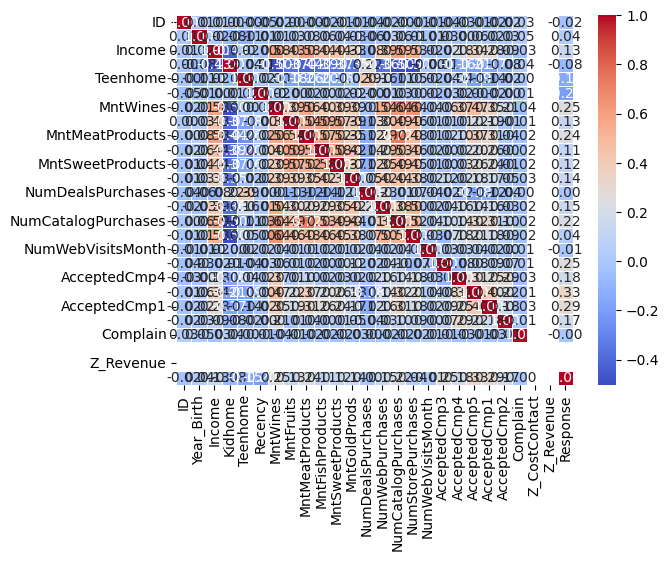

In [124]:
#heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f') # Changed etfs to df
plt.show()

In [125]:
#standard scaler
from sklearn.preprocessing import StandardScaler


In [126]:
# 1. Select numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
print(numerical_features)



Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')


In [127]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_features])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features, index=df.index)
print(df_scaled)



            ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0    -0.020999   -0.118235  0.234063 -0.825218 -0.929894  0.307039  0.983781   
1    -1.053058   -0.118235 -0.234559  1.032559  0.906934 -0.383664 -0.870479   
2    -0.447070   -0.118235  0.769478 -0.825218 -0.929894 -0.798086  0.362723   
3     0.181716   -0.118235 -1.017239  1.032559 -0.929894 -0.798086 -0.870479   
4    -0.082614   -0.118235  0.240221  1.032559 -0.929894  1.550305 -0.389085   
...        ...         ...       ...       ...       ...       ...       ...   
2235  1.625983   -0.118235  0.356642 -0.825218  0.906934 -0.107383  1.203678   
2236 -0.490200   -0.118235  0.467539  2.890335  0.906934  0.237969  0.303291   
2237  0.516905   -0.118235  0.188091 -0.825218 -0.929894  1.446700  1.795020   
2238  0.814199   -0.118235  0.675388 -0.825218  0.906934 -1.419719  0.368666   
2239  1.174650   -0.118235  0.024705  1.032559  0.906934 -0.314594 -0.653555   

      MntFruits  MntMeatProducts  MntFi

In [128]:
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features, index=df.index)
df_final = pd.concat([df_scaled, df.drop(columns=numerical_features)], axis=1)

print(df_final)

            ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0    -0.020999   -0.118235  0.234063 -0.825218 -0.929894  0.307039  0.983781   
1    -1.053058   -0.118235 -0.234559  1.032559  0.906934 -0.383664 -0.870479   
2    -0.447070   -0.118235  0.769478 -0.825218 -0.929894 -0.798086  0.362723   
3     0.181716   -0.118235 -1.017239  1.032559 -0.929894 -0.798086 -0.870479   
4    -0.082614   -0.118235  0.240221  1.032559 -0.929894  1.550305 -0.389085   
...        ...         ...       ...       ...       ...       ...       ...   
2235  1.625983   -0.118235  0.356642 -0.825218  0.906934 -0.107383  1.203678   
2236 -0.490200   -0.118235  0.467539  2.890335  0.906934  0.237969  0.303291   
2237  0.516905   -0.118235  0.188091 -0.825218 -0.929894  1.446700  1.795020   
2238  0.814199   -0.118235  0.675388 -0.825218  0.906934 -1.419719  0.368666   
2239  1.174650   -0.118235  0.024705  1.032559  0.906934 -0.314594 -0.653555   

      MntFruits  MntMeatProducts  MntFi

In [129]:
#modelbuilding
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [130]:
#split your data
X = df_final.drop('Income', axis=1)
y = df_final['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train


,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education,Marital_Status,Dt_Customer
792,-0.651017,-0.118235,-0.825218,-0.929894,-0.003777,-0.891280,-0.460265,-0.691069,-0.467355,-0.607273,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Graduation,Married,2013-07-19
1271,0.584066,-0.118235,-0.825218,0.906934,-0.659946,0.344893,-0.284229,0.084417,2.077650,0.265004,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Graduation,Single,2013-01-22
1538,-1.390403,-0.118235,-0.825218,0.906934,0.341574,2.068405,-0.661449,-0.403031,-0.687068,-0.655733,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Basic,Married,2012-10-16
668,1.668190,-0.118235,1.032559,-0.929894,-0.210988,-0.825906,-0.661449,-0.713225,-0.687068,-0.655733,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Master,Single,2013-05-09
1975,1.453768,-0.118235,-0.825218,0.906934,-1.696001,-0.855622,-0.560857,-0.686637,-0.650449,-0.558813,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,2n Cycle,Single,2013-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.599797,-0.118235,1.032559,0.906934,-1.108903,-0.831849,-0.636301,-0.695500,-0.650449,-0.655733,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,2n Cycle,Married,2014-06-19
1095,1.346865,-0.118235,-0.825218,0.906934,0.237969,-0.421772,0.595952,-0.296679,0.319948,0.071165,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Basic,Married,2013-08-07
1130,-0.671658,-0.118235,-0.825218,0.906934,0.617856,1.518664,-0.460265,-0.504952,-0.485665,-0.655733,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Graduation,Divorced,2013-01-15
1294,-0.856813,-0.118235,1.032559,0.906934,-0.970762,-0.748645,-0.661449,-0.699931,-0.687068,-0.655733,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Master,Divorced,2014-04-12


In [131]:
# Create a Preprocessing Pipeline
from sklearn.pipeline import Pipeline # Added import here
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features


Index(['Education', 'Marital_Status'], dtype='object')

In [132]:
# 2. Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [133]:
# 3. Create a ColumnTransformer to apply transformers to respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [134]:
# 4. Create a pipeline with preprocessing and the Logistic Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increased max_iter
])


In [135]:
# 5. Split your data
X=df_final.drop('Income',axis=1)
y=df_final['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education,Marital_Status,Dt_Customer
792,-0.651017,-0.118235,-0.825218,-0.929894,-0.003777,-0.891280,-0.460265,-0.691069,-0.467355,-0.607273,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Graduation,Married,2013-07-19
1271,0.584066,-0.118235,-0.825218,0.906934,-0.659946,0.344893,-0.284229,0.084417,2.077650,0.265004,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Graduation,Single,2013-01-22
1538,-1.390403,-0.118235,-0.825218,0.906934,0.341574,2.068405,-0.661449,-0.403031,-0.687068,-0.655733,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Basic,Married,2012-10-16
668,1.668190,-0.118235,1.032559,-0.929894,-0.210988,-0.825906,-0.661449,-0.713225,-0.687068,-0.655733,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Master,Single,2013-05-09
1975,1.453768,-0.118235,-0.825218,0.906934,-1.696001,-0.855622,-0.560857,-0.686637,-0.650449,-0.558813,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,2n Cycle,Single,2013-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.599797,-0.118235,1.032559,0.906934,-1.108903,-0.831849,-0.636301,-0.695500,-0.650449,-0.655733,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,2n Cycle,Married,2014-06-19
1095,1.346865,-0.118235,-0.825218,0.906934,0.237969,-0.421772,0.595952,-0.296679,0.319948,0.071165,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Basic,Married,2013-08-07
1130,-0.671658,-0.118235,-0.825218,0.906934,0.617856,1.518664,-0.460265,-0.504952,-0.485665,-0.655733,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Graduation,Divorced,2013-01-15
1294,-0.856813,-0.118235,1.032559,0.906934,-0.970762,-0.748645,-0.661449,-0.699931,-0.687068,-0.655733,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Master,Divorced,2014-04-12


In [136]:
#create dummy variables
df = pd.get_dummies(df, columns=['Income'])
df

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Income_105471.0,Income_113734.0,Income_153924.0,Income_156924.0,Income_157146.0,Income_157243.0,Income_157733.0,Income_160803.0,Income_162397.0,Income_666666.0
0,5524,1990,Master,Divorced,0,0,2012-09-04,58,635,88,...,False,False,False,False,False,False,False,False,False,False
1,2174,1990,Graduation,Married,1,1,2014-03-08,38,11,1,...,False,False,False,False,False,False,False,False,False,False
2,4141,1990,Master,Single,0,0,2013-08-21,26,426,49,...,False,False,False,False,False,False,False,False,False,False
3,6182,1990,2n Cycle,Married,1,0,2014-02-10,26,11,4,...,False,False,False,False,False,False,False,False,False,False
4,5324,1990,Basic,Single,1,0,2014-01-19,94,173,43,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1990,PhD,Divorced,0,1,2013-06-13,46,709,43,...,False,False,False,False,False,False,False,False,False,False
2236,4001,1990,Master,Married,2,1,2014-06-10,56,406,0,...,False,False,False,False,False,False,False,False,False,False
2237,7270,1990,Basic,Married,0,0,2014-01-25,91,908,48,...,False,False,False,False,False,False,False,False,False,False
2238,8235,1990,PhD,Married,0,1,2014-01-24,8,428,30,...,False,False,False,False,False,False,False,False,False,False


In [137]:
from sklearn.dummy import DummyRegressor # Import DummyRegressor

y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train, y_train)
y_pred = dummy_regressor.predict(X_test)
print(y_pred)

[-0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0.01126971
 -0.01126971 -0.01126971 -0.01126971 -0.01126971 -0

In [138]:
#get the r squre
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)


-0.00472380117340232


In [139]:
# Assuming 'categorical_features' is the list of categorical columns
# from your previous pre-processing steps

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for KMeans
encoded_data = encoder.fit_transform(X_train[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)

X_train_encoded = X_train.drop(columns=categorical_features).join(encoded_df)
X_train_encoded


,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Response,Dt_Customer,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
792,-0.651017,-0.118235,-0.825218,-0.929894,-0.003777,-0.891280,-0.460265,-0.691069,-0.467355,-0.607273,...,-0.418612,2013-07-19,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1271,0.584066,-0.118235,-0.825218,0.906934,-0.659946,0.344893,-0.284229,0.084417,2.077650,0.265004,...,-0.418612,2013-01-22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1538,-1.390403,-0.118235,-0.825218,0.906934,0.341574,2.068405,-0.661449,-0.403031,-0.687068,-0.655733,...,-0.418612,2012-10-16,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
668,1.668190,-0.118235,1.032559,-0.929894,-0.210988,-0.825906,-0.661449,-0.713225,-0.687068,-0.655733,...,-0.418612,2013-05-09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1975,1.453768,-0.118235,-0.825218,0.906934,-1.696001,-0.855622,-0.560857,-0.686637,-0.650449,-0.558813,...,-0.418612,2013-10-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.599797,-0.118235,1.032559,0.906934,-1.108903,-0.831849,-0.636301,-0.695500,-0.650449,-0.655733,...,-0.418612,2014-06-19,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1095,1.346865,-0.118235,-0.825218,0.906934,0.237969,-0.421772,0.595952,-0.296679,0.319948,0.071165,...,-0.418612,2013-08-07,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1130,-0.671658,-0.118235,-0.825218,0.906934,0.617856,1.518664,-0.460265,-0.504952,-0.485665,-0.655733,...,-0.418612,2013-01-15,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1294,-0.856813,-0.118235,1.032559,0.906934,-0.970762,-0.748645,-0.661449,-0.699931,-0.687068,-0.655733,...,-0.418612,2014-04-12,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [140]:
# Determine the optimal number of clusters using the Elbow Method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


In [141]:
# Assuming 'categorical_features' is the list of categorical columns
# from your previous pre-processing steps

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for KMeans
encoded_data = encoder.fit_transform(X_train[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)

# Convert 'Dt_Customer' to datetime before dropping categorical features
X_train['Dt_Customer'] = pd.to_datetime(X_train['Dt_Customer'])

X_train_encoded = X_train.drop(columns=categorical_features).join(encoded_df)

# Now you can create the numeric representation:
X_train_encoded['Dt_Customer_Numeric'] = (X_train_encoded['Dt_Customer'] - pd.Timestamp('1970-01-01')).dt.days
X_train_encoded = X_train_encoded.drop(columns=['Dt_Customer'])
X_train_encoded

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Dt_Customer_Numeric
792,-0.651017,-0.118235,-0.825218,-0.929894,-0.003777,-0.891280,-0.460265,-0.691069,-0.467355,-0.607273,...,-0.418612,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,15905
1271,0.584066,-0.118235,-0.825218,0.906934,-0.659946,0.344893,-0.284229,0.084417,2.077650,0.265004,...,-0.418612,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,15727
1538,-1.390403,-0.118235,-0.825218,0.906934,0.341574,2.068405,-0.661449,-0.403031,-0.687068,-0.655733,...,-0.418612,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15629
668,1.668190,-0.118235,1.032559,-0.929894,-0.210988,-0.825906,-0.661449,-0.713225,-0.687068,-0.655733,...,-0.418612,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,15834
1975,1.453768,-0.118235,-0.825218,0.906934,-1.696001,-0.855622,-0.560857,-0.686637,-0.650449,-0.558813,...,-0.418612,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.599797,-0.118235,1.032559,0.906934,-1.108903,-0.831849,-0.636301,-0.695500,-0.650449,-0.655733,...,-0.418612,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16240
1095,1.346865,-0.118235,-0.825218,0.906934,0.237969,-0.421772,0.595952,-0.296679,0.319948,0.071165,...,-0.418612,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15924
1130,-0.671658,-0.118235,-0.825218,0.906934,0.617856,1.518664,-0.460265,-0.504952,-0.485665,-0.655733,...,-0.418612,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,15720
1294,-0.856813,-0.118235,1.032559,0.906934,-0.970762,-0.748645,-0.661449,-0.699931,-0.687068,-0.655733,...,-0.418612,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,16172


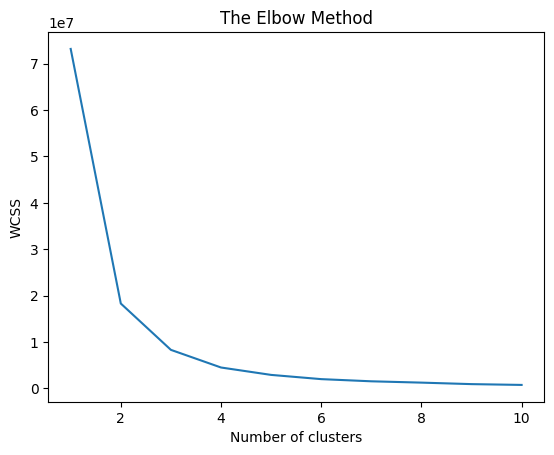

In [142]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_train_encoded)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [143]:
# Fit K-Means with the optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_train_encoded)
kmeans.labels_
kmeans.cluster_centers_


array([[-5.68181015e-03, -4.84679325e-02,  2.46162434e-02,
        -5.05616329e-02, -2.17061822e-02, -1.17249278e-01,
        -5.81641226e-02, -8.17772212e-02, -8.01312331e-02,
        -4.63763207e-02, -6.78932047e-02, -1.78148794e-01,
        -9.79288274e-02, -5.10830676e-02, -5.39299756e-02,
         6.37778705e-02,  6.54550445e-03, -6.51265344e-02,
        -1.80275625e-02, -1.05340205e-02, -4.24725657e-02,
         1.31088769e-02,  0.00000000e+00,  0.00000000e+00,
        -1.55786210e-01,  2.19148936e-01,  2.08510638e-01,
         1.95744681e-01,  2.06382979e-01,  1.70212766e-01,
         3.23404255e-01,  3.42553191e-01,  3.34042553e-01,
         1.59755979e+04],
       [ 3.86459627e-02,  5.36171550e-02,  1.30210222e-01,
        -1.75356558e-02, -7.48969683e-02, -2.07694902e-01,
        -6.44184957e-02, -9.87776612e-02, -7.99206131e-02,
        -8.92321822e-02, -2.43393911e-01, -2.25120988e-01,
        -2.70241230e-01, -1.28775353e-01, -1.66704055e-01,
        -7.97853973e-02,  4.98

In [144]:
# Display cluster centers
print(kmeans.cluster_centers_)

[[-5.68181015e-03 -4.84679325e-02  2.46162434e-02 -5.05616329e-02
  -2.17061822e-02 -1.17249278e-01 -5.81641226e-02 -8.17772212e-02
  -8.01312331e-02 -4.63763207e-02 -6.78932047e-02 -1.78148794e-01
  -9.79288274e-02 -5.10830676e-02 -5.39299756e-02  6.37778705e-02
   6.54550445e-03 -6.51265344e-02 -1.80275625e-02 -1.05340205e-02
  -4.24725657e-02  1.31088769e-02  0.00000000e+00  0.00000000e+00
  -1.55786210e-01  2.19148936e-01  2.08510638e-01  1.95744681e-01
   2.06382979e-01  1.70212766e-01  3.23404255e-01  3.42553191e-01
   3.34042553e-01  1.59755979e+04]
 [ 3.86459627e-02  5.36171550e-02  1.30210222e-01 -1.75356558e-02
  -7.48969683e-02 -2.07694902e-01 -6.44184957e-02 -9.87776612e-02
  -7.99206131e-02 -8.92321822e-02 -2.43393911e-01 -2.25120988e-01
  -2.70241230e-01 -1.28775353e-01 -1.66704055e-01 -7.97853973e-02
   4.98409082e-02 -2.44478328e-02  4.13798522e-02  5.15261367e-02
   1.73271796e-02 -2.88637908e-02  0.00000000e+00  0.00000000e+00
  -1.65632335e-01  1.86813187e-01  1.8241

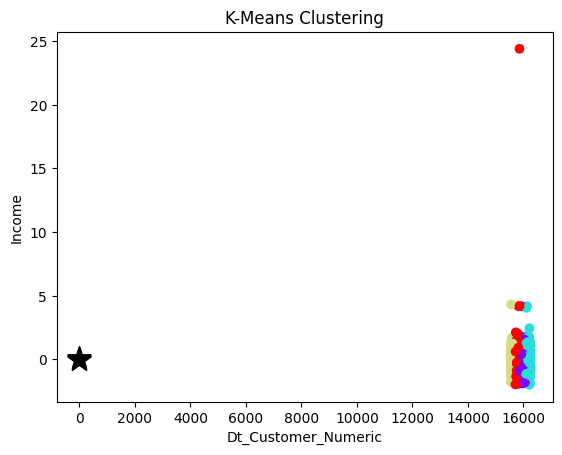

In [145]:
#visulize the cluster
# Instead of using 'Income', you should use the original DataFrame (df) or the y_train for Income values
plt.scatter(X_train_encoded['Dt_Customer_Numeric'], y_train, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='black')
plt.xlabel('Dt_Customer_Numeric')
plt.ylabel('Income')
plt.title('K-Means Clustering')
plt.show()

In [146]:
# Evaluate clustering
silhouette_avg = silhouette_score(X_train_encoded, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5751257343058863


In [147]:
#create custom metric
from sklearn.metrics import make_scorer
def custom_metric(y_true, y_pred):
  r2 = r2_score(y_true, y_pred)
  return r2

In [148]:
#make scorer and define that higher scores are better
custom_scorer = make_scorer(custom_metric, greater_is_better=True, needs_proba=False, needs_threshold=False)
custom_scorer

make_scorer(custom_metric, response_method='predict', needs_proba=False, needs_threshold=False)

In [149]:
#create ridge regression object
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg

Ridge()

In [150]:
model=ridge_reg.fit(X_train_encoded,y_train)
print(model.score(X_train_encoded,y_train))

0.4794453380352166


In [151]:
#apply custome scorer
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
cross_val_score(ridge_reg,X_train_encoded,y_train,cv=5,scoring=custom_scorer)
print(cross_val_score(ridge_reg,X_train_encoded,y_train,cv=5,scoring=custom_scorer))


[nan nan nan nan nan]


In [152]:
#visualzing the effect of training set size
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(ridge_reg, X_train_encoded, y_train)
train_sizes


array([ 143,  465,  788, 1110, 1433])

In [153]:
#create cv training and test scores for various training set sizes
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
print(train_mean)
print(train_std)
print(val_mean)
print(val_std)

[0.70196263 0.36888513 0.45539469 0.47997153 0.49754064]
[0.27125721 0.21784667 0.16845652 0.12669436 0.10427978]
[0.26529431 0.54324171 0.57178144 0.58106838 0.58703368]
[0.43845442 0.18562118 0.19632407 0.20045174 0.20356716]


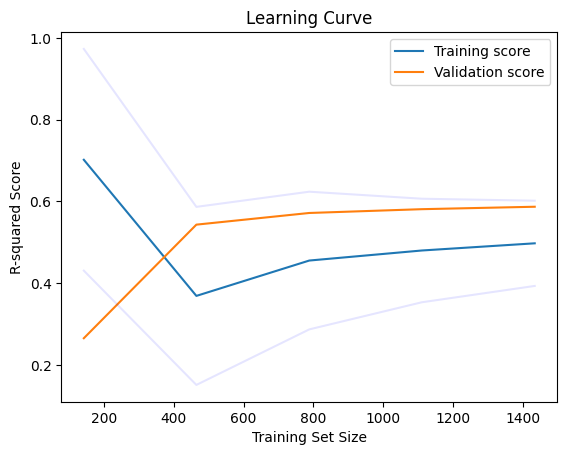

In [154]:
#create means and standard deviation of test set scores
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Validation score')
plt.plot(train_sizes, train_mean + train_std, color='blue', alpha=0.1)
plt.plot(train_sizes, train_mean - train_std, color='blue', alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [155]:
#pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_encoded)
X_train_pca


array([[ 7.95620294e+00, -1.55786386e+00],
       [-1.70051016e+02,  1.08261532e+00],
       [-2.68049729e+02,  6.79443325e-02],
       ...,
       [-1.77050221e+02,  2.20673041e-02],
       [ 2.74955741e+02, -2.09066125e+00],
       [ 1.98955699e+02, -2.07014114e+00]])

In [156]:
#evlolate
pca.explained_variance_ratio_


array([9.99399366e-01, 1.38553975e-04])

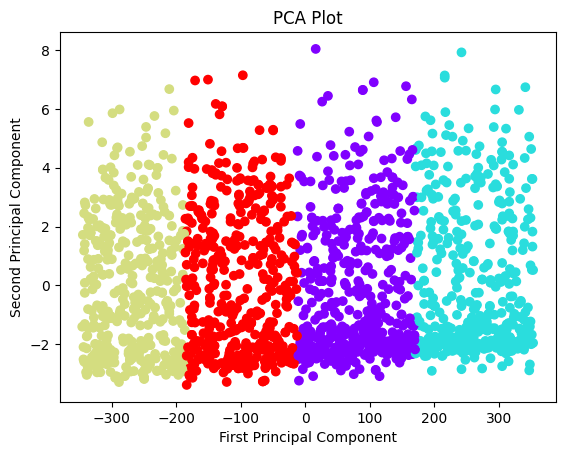

In [157]:
#pca plot
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=kmeans.labels_,cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Plot')
plt.show()

In [158]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 9.0 MB/s eta 0:00:00


In [159]:
import streamlit as st
st.title('Marketing campaign analysis')


2025-01-05 19:54:30.826 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:54:31.066 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-05 19:54:31.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [160]:
st.dataframe(df)

2025-01-05 19:54:31.257 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:54:31.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

<bound method PyplotMixin.pyplot of DeltaGenerator()>

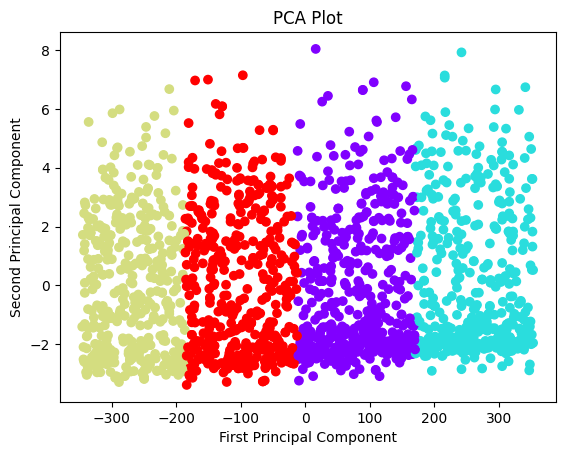

In [161]:
# Create a scatter plot
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Plot')

# Display the plot in Streamlit
st.pyplot

In [162]:
# Save Model Using Pickle
import pickle
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [163]:
!pip freeze > requirements.txt


In [164]:
import pandas as pd
import streamlit as st
import pickle
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
st.title('Marketing campaign analysis')
st.sidebar.header('User Input Features')
def user_input_features():
    Income = st.sidebar.number_input('Income', min_value=0)
    Year_Birth = st.sidebar.number_input('Year_Birth', min_value=0)
    Kidhome = st.sidebar.number_input('Kidhome', min_value=0)
    Teenhome = st.sidebar.number_input('Teenhome', min_value=0)
    Recency = st.sidebar.number_input('Recency', min_value=0)
    MntWines = st.sidebar.number_input('MntWines', min_value=0)
    NumWebVisitsMonth = st.sidebar.number_input('NumWebVisitsMonth', min_value=0)
    data = {'Income': Income,
            'Year_Birth': Year_Birth,
            'Kidhome': Kidhome,
            'Teenhome': Teenhome,
            'Recency': Recency,
            'MntWines': MntWines,
            'NumWebVisitsMonth': NumWebVisitsMonth}
    features = pd.DataFrame(data, index=[0])
    return features
df = user_input_features()
st.subheader('User Input parameters')
st.write(df)


2025-01-05 19:54:32.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:54:32.752 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:54:32.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:54:32.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:54:32.759 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:54:32.761 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:54:32.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:54:32.763 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [165]:
!pip install pyngrok
